In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [3]:
ccpi = pd.read_csv("ccpi_2024.csv")

In [4]:
# Load the map of Europe. This includes countries' geometries.
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
europe = world[world['continent'] == 'Europe']

C:\Users\gusta\AppData\Local\Temp\ipykernel_110528\4056184098.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


In [5]:
map_ccpi = pd.merge(europe, ccpi, left_on="name", right_on='Country', how='left')

In [6]:
map_ccpi['CCPI_Reweighted_Score'] = \
        map_ccpi['2024_CCPI_Climate_Policy']*0.25 +\
        map_ccpi['2024_CCPI_Energy_Use']*0.25 +\
        map_ccpi['2024_CCPI_GHG']*0.25 +\
        map_ccpi['2024_CCPI_Renewables']*0.25

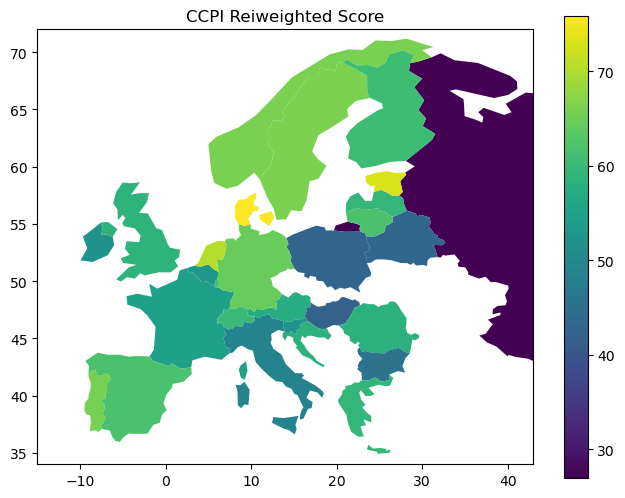

In [7]:
# Plotting the choropleth map
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
europe_chloropleth = map_ccpi.plot(column='CCPI_Reweighted_Score', ax=ax, legend=True)

# Change the focus so its only europe 
ax.set_xlim(-15, 43)  # Longitude limits
ax.set_ylim(34, 72)   # Latitude limits
plt.title("CCPI Reiweighted Score")

plt.show()

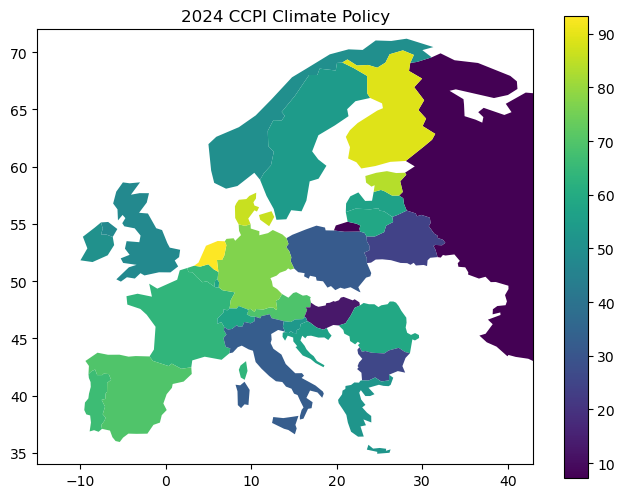

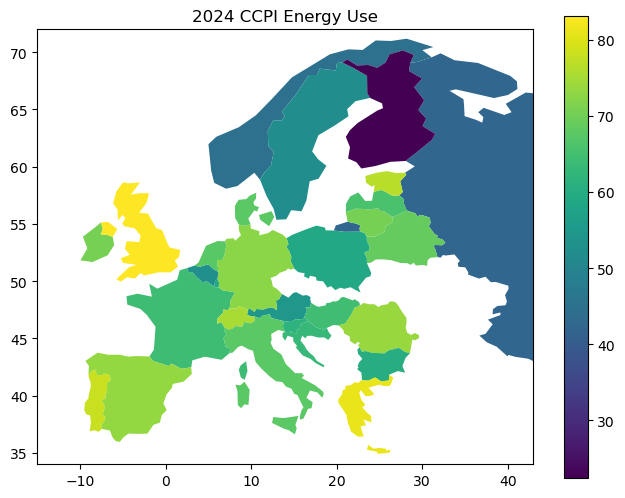

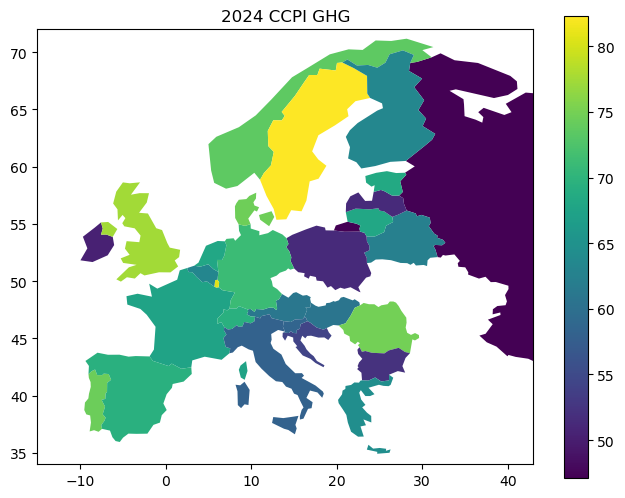

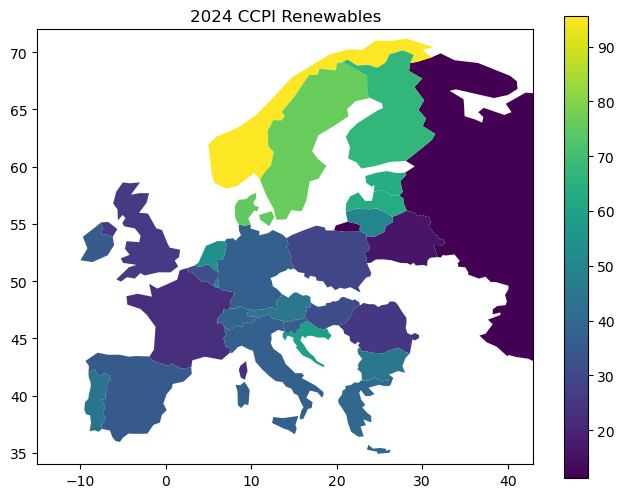

In [8]:
var_list = ['2024_CCPI_Climate_Policy', '2024_CCPI_Energy_Use', '2024_CCPI_GHG', '2024_CCPI_Renewables']

for var in var_list:
    # Plotting the choropleth map
    fig, ax = plt.subplots(1, 1, figsize=(8, 6))
    europe_chloropleth = map_ccpi.plot(column=var, ax=ax, legend=True)

    # Change the focus so its only europe 
    ax.set_xlim(-15, 43)  # Longitude limits
    ax.set_ylim(34, 72)   # Latitude limits
    plt.title(var.replace("_", " "))

    plt.show()